Data Generation
===

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
n, d, k = 100, 2, 2

In [61]:
X = np.random.rand(n, d) # uniform distribution over [0, 1).

In [62]:
# means: uniform distr. between [0,0.5] and [0.5,1]
means = [np.random.rand(d) * 0.5 + 0.5 , - np.random.rand(d)  * 0.5 + 0.5] 

# var: diagonal covariance matrix 
S = np.diag(np.random.rand(d)) 

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results (list)

print(means)
print(sigmas)

[array([ 0.85729886,  0.96987571]), array([ 0.11714685,  0.10835637])]
[array([[ 0.55342258,  0.        ],
       [ 0.        ,  0.74471093]]), array([[ 0.55342258,  0.        ],
       [ 0.        ,  0.74471093]])]


Solution
===

In [63]:
def compute_p(X,mean,sigma):
    factor=1/((2*np.pi)**(d/2)*np.linalg.det(sigma)**(1/2))
    p=factor*np.exp(-0.5*np.sum(np.multiply(np.matmul((X-mean),np.linalg.inv(sigma)),(X-mean)), axis=1))
    return p

- **zip()** returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.

In [64]:
probabilities = [compute_p(X, m, s) for m, s in zip(means, sigmas)] # exercise: try to do this without looping
probabilities=np.array(probabilities).T

In [65]:
assignments = np.argmax(probabilities, axis=1)
assignments

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1])

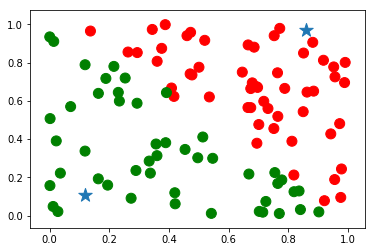

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(['red', 'green'])[assignments], s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()